In [2]:
import os
import matplotlib.pyplot as plt
import json
import numpy as np

In [5]:
dataset = "cub200"
basepath = f"lightning_logs/{dataset}"

models = ["deterministic", "pfe", "laplace_posthoc_fix", "laplace_posthoc_pos", "laplace_posthoc_full",
                "laplace_online_fix", "laplace_online_pos", "laplace_online_full",
                "laplace_posthoc_arccos_pos", "laplace_posthoc_arccos_full",
                "laplace_online_arccos_pos", "laplace_online_arccos_full"]

#models = ["mc_dropout"]
#models = ["laplace_online_full"]
models = ["pfe"]

all_data = {}
for model in models:

    all_data[model] = {}
    for seed in range(1, 6):
        if "laplace_online" in model:
            if "arccos" in model:
                path = os.path.join(basepath, "laplace_online", str(seed), "arccos", model.split("_")[-1], "results/metrics.json")
            else:
                path = os.path.join(basepath, "laplace_online", str(seed), "contrastive", model.split("_")[-1], "results/metrics.json")
        elif "laplace_posthoc" in model:
            if "arccos" in model:
                path = os.path.join(basepath, "laplace_posthoc", str(seed), "arccos", model.split("_")[-1], "results/metrics.json")
            else:
                path = os.path.join(basepath, "laplace_posthoc", str(seed), "contrastive", model.split("_")[-1], "results/metrics.json")
        else:
            path = os.path.join(basepath, model, str(seed), "results/metrics.json")

        if not os.path.isfile(path):
            print(f"missing => {model} with seed {seed}")
            continue

        with open(path, 'r') as f:
            data = json.load(f)

        for key in data:
            if key in all_data[model]: 
                all_data[model][key] += [data[key]]
            else:
                all_data[model][key] = [data[key]]
        

In [6]:
first_row = ["", "M@1", "M@5", "M@10", "AUROC", "AUPRC", "AUSC", "ECE"]
print("    &   ".join(first_row) + r"\\")

for model in all_data.keys():
    if "map" in all_data[model]:
        
        map = np.array(all_data[model]["map"])[:, :2]
        recall = np.array(all_data[model]["recall"])[:, :1]

        row = [model]
        row += [f"{np.round(m,2)}" + r"\pm" + f"{np.round(s,2)}" for m, s in zip(recall.mean(axis=0), recall.std(axis=0))]
        row += [f"{np.round(m,2)}" + r"\pm" + f"{np.round(s,2)}" for m, s in zip(map.mean(axis=0), map.std(axis=0))]
        

        for m in ["auroc", "auprc", "ausc", "ece"]:
            if m in all_data[model]:
                val = np.array(all_data[model][m])
                row += [f"{np.round(val.mean(),2)}" + r"\pm" + f"{np.round(val.std(),2)}"]
            else:
                row += ["-"]

        latex_row = ""
        for i, r in enumerate(row):
            end = " & " if i != len(row) - 1 else r" \\"

            latex_row += "$" + r + "$" + end if i > 0 else r.replace("_", " ") + end

        print(latex_row)

    &   M@1    &   M@5    &   M@10    &   AUROC    &   AUPRC    &   AUSC    &   ECE\\
pfe & $0.62\pm0.01$ & $0.49\pm0.0$ & $0.43\pm0.0$ & $0.42\pm0.21$ & $0.5\pm0.08$ & $0.61\pm0.03$ & $0.06\pm0.03$ \\


In [10]:
first_row = ["", "R@1", "R@5", "R@10", "R@20", "M@5", "M@10", "M@20", "AUROC", "AUPRC", "AUSC", "ECE"]
print("    &   ".join(first_row) + r"\\")

for model in all_data.keys():
    if "map" in all_data[model]:
        
        map = np.array(all_data[model]["map"])
        recall = np.array(all_data[model]["recall"])

        row = [model]
        row += [f"{np.round(m,2)}" + r"\pm" + f"{np.round(s,2)}" for m, s in zip(recall.mean(axis=0), recall.std(axis=0))]
        row += [f"{np.round(m,2)}" + r"\pm" + f"{np.round(s,2)}" for m, s in zip(map.mean(axis=0), map.std(axis=0))]
        

        for m in ["auroc", "auprc", "ausc", "ece"]:
            if m in all_data[model]:
                val = np.array(all_data[model][m])
                row += [f"{np.round(val.mean(),2)}" + r"\pm" + f"{np.round(val.std(),2)}"]
            else:
                row += ["-"]

        latex_row = ""
        for i, r in enumerate(row):
            end = " & " if i != len(row) - 1 else r" \\"

            latex_row += "$" + r + "$" + end if i > 0 else r.replace("_", " ") + end

        print(latex_row)

    &   R@1    &   R@5    &   R@10    &   R@20    &   M@5    &   M@10    &   M@20    &   AUROC    &   AUPRC    &   AUSC    &   ECE\\
deterministic & $0.79\pm0.01$ & $0.93\pm0.0$ & $0.96\pm0.0$ & $0.98\pm0.0$ & $0.74\pm0.01$ & $0.72\pm0.01$ & $0.71\pm0.01$ & $-$ & $-$ & $-$ & $-$ \\
pfe & $0.79\pm0.01$ & $0.93\pm0.0$ & $0.96\pm0.0$ & $0.98\pm0.0$ & $0.74\pm0.01$ & $0.72\pm0.01$ & $0.71\pm0.01$ & $0.65\pm0.2$ & $0.6\pm0.16$ & $0.77\pm0.09$ & $0.25\pm0.05$ \\
laplace posthoc fix & $0.78\pm0.01$ & $0.93\pm0.0$ & $0.96\pm0.0$ & $0.98\pm0.0$ & $0.74\pm0.01$ & $0.72\pm0.01$ & $0.71\pm0.01$ & $0.96\pm0.01$ & $0.96\pm0.01$ & $0.85\pm0.02$ & $0.04\pm0.0$ \\
laplace posthoc pos & $0.79\pm0.01$ & $0.93\pm0.0$ & $0.96\pm0.0$ & $0.98\pm0.0$ & $0.74\pm0.01$ & $0.72\pm0.01$ & $0.71\pm0.01$ & $0.98\pm0.01$ & $0.98\pm0.01$ & $0.78\pm0.02$ & $0.05\pm0.01$ \\
laplace posthoc full & $0.79\pm0.01$ & $0.93\pm0.0$ & $0.96\pm0.0$ & $0.98\pm0.0$ & $0.74\pm0.01$ & $0.72\pm0.01$ & $0.71\pm0.01$ & $0.95\pm0.01$ & 

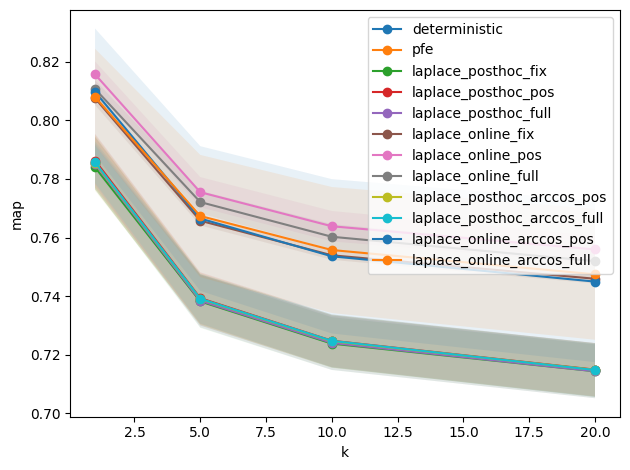

In [11]:
for model in all_data.keys():
    if "map" in all_data[model]:

        map = np.array(all_data[model]["map"])
        recall = np.array(all_data[model]["recall"])

        y = np.array([recall.mean(axis=0)[0], *map.mean(axis=0)])
        ci = np.array([recall.std(axis=0)[0], *map.std(axis=0)])

        x = [1, 5, 10, 20]
        plt.plot(x, y, "-o", label=model)
        # Plot the confidence interval
        plt.fill_between(x, (y-ci), (y+ci), alpha=0.1)
    
plt.xlabel("k")
plt.ylabel("map")
plt.legend()
plt.tight_layout()
plt.savefig(f"results/{dataset}/map.png")
plt.show()

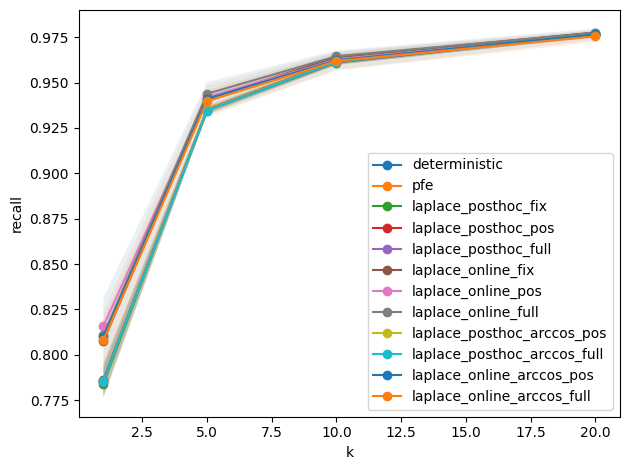

In [12]:
for model in all_data.keys():
    if "recall" in all_data[model]:

        recall = np.array(all_data[model]["recall"])

        y = recall.mean(axis=0)
        ci = recall.std(axis=0)

        x = [1, 5, 10, 20]
        plt.plot(x, y, "-o", label=model)
        # Plot the confidence interval
        plt.fill_between(x, (y-ci), (y+ci), alpha=0.1)
    
plt.xlabel("k")
plt.ylabel("recall")
plt.legend()
plt.tight_layout()
plt.savefig(f"results/{dataset}/recall.png")
plt.show()

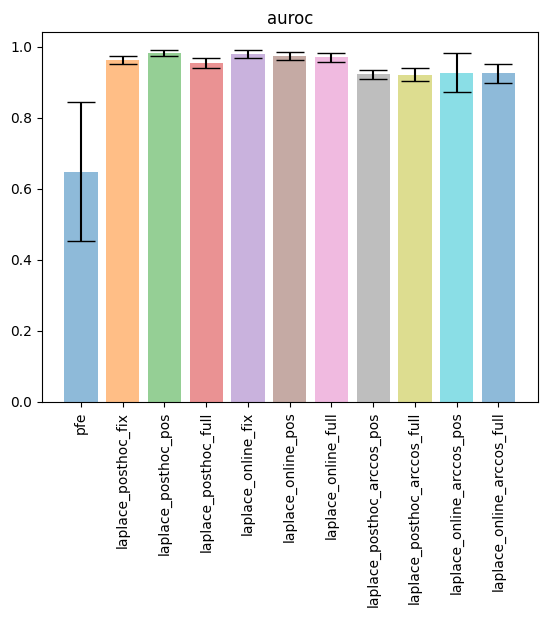

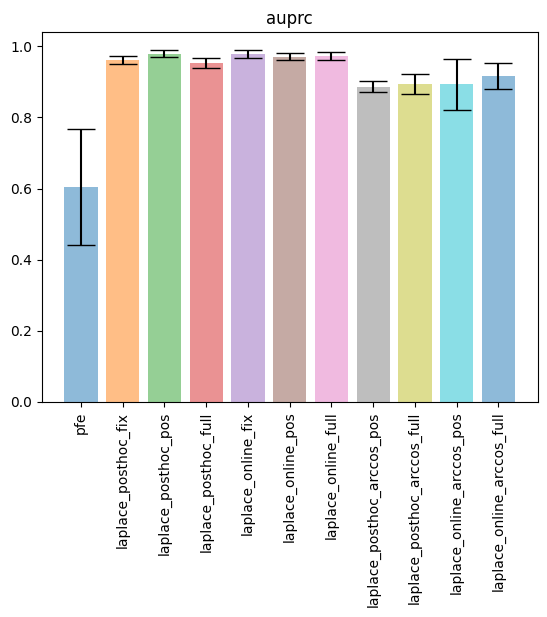

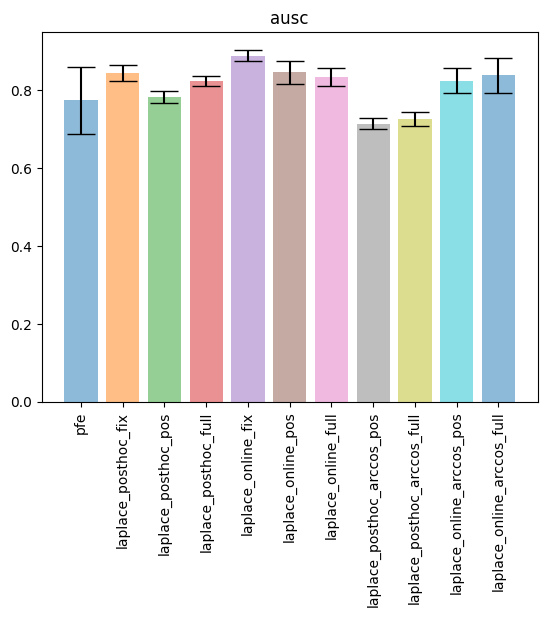

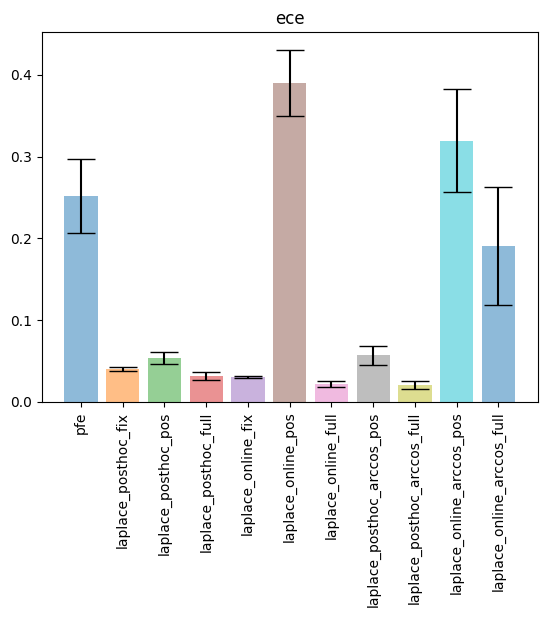

In [13]:
for metric in ["auroc", "auprc", "ausc", "ece"]:
    fig, ax = plt.subplots()
    x_pos = -1
    names = []
    for model in all_data.keys():
        
        if metric in all_data[model]:
            x_pos += 1
            names.append(model)
            val = np.array(all_data[model][metric])

            y = val.mean(axis=0)
            ci = val.std(axis=0)

            ax.bar(x_pos, y, yerr=ci, align='center', alpha=0.5, ecolor='black', capsize=10)
            
    ax.set_title(metric)
    ax.set_xticks(list(range(len(names))))
    ax.set_xticklabels(names, rotation = 90)
    plt.savefig(f"results/{dataset}/{metric}.png")        
    plt.show()